In [1]:
sysname = 'SysName'

In [4]:
import palettable
colors = palettable.colorbrewer.qualitative.Paired_10.hex_colors
linestyles = ['-', '--']
colors_blue = colors[1]
colors_red = colors[5]
colors_green = colors[3]
colors_orange = colors[7]
MW = 0.6

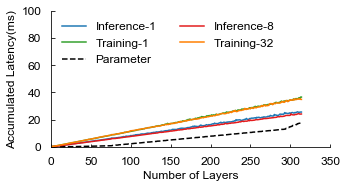

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable
import numpy as np
from math import log

# Reasonable - ResNet
# Latency v.s. Layer
file_label = 'reasonable_resnet'

# Import data
def import_data(filename):
    transmission_latency_ms_list = [0.0]
    computation_latency_ms_list = []
    with open(filename) as f:
        for line in f.readlines():
            parts = line.split(',')
            parameter_size_byte = int(parts[0].strip())
            transmission_latency_ms = float(parameter_size_byte) / 1024 / 1024 / 1024 * 8 / 100 * 1000
            transmission_latency_ms_list.append(transmission_latency_ms)
            computation_latency_s = float(parts[1].strip())
            computation_latency_ms = computation_latency_s * 1000
            computation_latency_ms_list.append(computation_latency_ms)
        computation_latency_ms_list.append(computation_latency_ms_list[-1])
    return transmission_latency_ms_list, computation_latency_ms_list

y_p, y_i1 = import_data('experiments/%s/inf-mode-resnet152-batch-1.txt' % file_label)
_, y_i8 = import_data('experiments/%s/inf-mode-resnet152-batch-8.txt' % file_label)
_, y_t1 = import_data('experiments/%s/train-mode-resnet152-batch-1.txt' % file_label)
_, y_t32 = import_data('experiments/%s/train-mode-resnet152-batch-32.txt' % file_label)
x = [i + 1 for i in range(len(y_p))]

# labels for x
x_label = 'Number of Layers'
x_ticks = [i * 50 for i in range(8)]
x_ticklabels = [str(i * 50) for i in range(8)]

# labels for y
y_label = 'Accumulated Latency(ms)'
y_ticks = [i * 20 for i in range(6)]
y_ticklabels = [str(i * 20) for i in range(6)]

# figure style
font_size = 12
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(5, 2.5))

# draw figure content
plt.plot(x, y_i1, label='Inference-1', color=colors_blue, linestyle='-', clip_on=False)
plt.plot(x, y_t1, label='Training-1', color=colors_green, linestyle='-', clip_on=False)
plt.plot(x, y_p, label='Parameter', color='black', linestyle='--', clip_on=False)
plt.plot(x, y_i8, label='Inference-8', color=colors_red, linestyle='-', clip_on=False)
plt.plot(x, y_t32, label='Training-32', color=colors_orange, linestyle='-', clip_on=False)
plt.legend(loc='upper left', frameon=False, ncol=2, prop={'size':font_size})

# draw figure labels
ax.tick_params(labelsize=font_size, pad=10)

ax.set_xlabel(x_label) 
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(left=0, right=350)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

ax.set_ylabel(y_label)
ax.yaxis.set_ticks_position('left')
ax.set_ylim(bottom=0, top=100)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)

ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight')

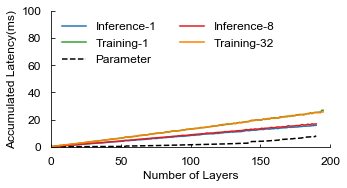

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable
import numpy as np
from math import log

# Reasonable - Inception
# Latency v.s. Layer
file_label = 'reasonable_inception'

# Import data
def import_data(filename):
    transmission_latency_ms_list = [0.0]
    computation_latency_ms_list = []
    with open(filename) as f:
        for line in f.readlines():
            parts = line.split(',')
            parameter_size_byte = int(parts[0].strip())
            transmission_latency_ms = float(parameter_size_byte) / 1024 / 1024 / 1024 * 8 / 100 * 1000
            transmission_latency_ms_list.append(transmission_latency_ms)
            computation_latency_s = float(parts[1].strip())
            computation_latency_ms = computation_latency_s * 1000
            computation_latency_ms_list.append(computation_latency_ms)
        computation_latency_ms_list.append(computation_latency_ms_list[-1])
    return transmission_latency_ms_list, computation_latency_ms_list

y_p, y_i1 = import_data('experiments/%s/inf-mode-inception_v3-batch-1.txt' % file_label)
_, y_i8 = import_data('experiments/%s/inf-mode-inception_v3-batch-8.txt' % file_label)
_, y_t1 = import_data('experiments/%s/train-mode-inception_v3-batch-1.txt' % file_label)
_, y_t32 = import_data('experiments/%s/train-mode-inception_v3-batch-32.txt' % file_label)
def x_index(y):
    return [i + 1 for i in range(len(y))]

# labels for x
x_label = 'Number of Layers'
x_ticks = [i * 50 for i in range(5)]
x_ticklabels = [str(i * 50) for i in range(5)]

# labels for y
y_label = 'Accumulated Latency(ms)'
y_ticks = [i * 20 for i in range(6)]
y_ticklabels = [str(i * 20) for i in range(6)]

# figure style
font_size = 12
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(5, 2.5))

# draw figure content
plt.plot(x_index(y_i1), y_i1, label='Inference-1', color=colors_blue, linestyle='-', clip_on=False)
plt.plot(x_index(y_t1), y_t1, label='Training-1', color=colors_green, linestyle='-', clip_on=False)
plt.plot(x_index(y_p), y_p, label='Parameter', color='black', linestyle='--', clip_on=False)
plt.plot(x_index(y_i8), y_i8, label='Inference-8', color=colors_red, linestyle='-', clip_on=False)
plt.plot(x_index(y_t32), y_t32, label='Training-32', color=colors_orange, linestyle='-', clip_on=False)
plt.legend(loc='upper left', frameon=False, ncol=2, prop={'size':font_size})

# draw figure labels
ax.tick_params(labelsize=font_size, pad=10)

ax.set_xlabel(x_label) 
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(left=0, right=200)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

ax.set_ylabel(y_label)
ax.yaxis.set_ticks_position('left')
ax.set_ylim(bottom=0, top=100)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)

ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight')

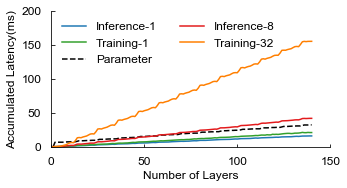

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable
import numpy as np
from math import log

# Reasonable - Bert
# Latency v.s. Layer
file_label = 'reasonable_bert'

# Import data
def import_data(filename):
    transmission_latency_ms_list = [0.0]
    computation_latency_ms_list = []
    with open(filename) as f:
        for line in f.readlines():
            parts = line.split(',')
            parameter_size_byte = int(parts[0].strip())
            transmission_latency_ms = float(parameter_size_byte) / 1024 / 1024 / 1024 * 8 / 100 * 1000
            transmission_latency_ms_list.append(transmission_latency_ms)
            computation_latency_s = float(parts[1].strip())
            computation_latency_ms = computation_latency_s * 1000
            computation_latency_ms_list.append(computation_latency_ms)
        computation_latency_ms_list.append(computation_latency_ms_list[-1])
    return transmission_latency_ms_list, computation_latency_ms_list

y_p, y_i1 = import_data('experiments/%s/inf-mode-bert_base-batch-1.txt' % file_label)
_, y_i8 = import_data('experiments/%s/inf-mode-bert_base-batch-8.txt' % file_label)
_, y_t1 = import_data('experiments/%s/train-mode-bert_base-batch-1.txt' % file_label)
_, y_t32 = import_data('experiments/%s/train-mode-bert_base-batch-32.txt' % file_label)
x = [i + 1 for i in range(len(y_p))]

# labels for x
x_label = 'Number of Layers'
x_ticks = [i * 50 for i in range(4)]
x_ticklabels = [str(i * 50) for i in range(4)]

# labels for y
y_label = 'Accumulated Latency(ms)'
y_ticks = [i * 50 for i in range(5)]
y_ticklabels = [str(i * 50) for i in range(5)]

# figure style
font_size = 12
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(5, 2.5))

# draw figure content
plt.plot(x, y_i1, label='Inference-1', color=colors_blue, linestyle='-', clip_on=False)
plt.plot(x, y_t1, label='Training-1', color=colors_green, linestyle='-', clip_on=False)
plt.plot(x, y_p, label='Parameter', color='black', linestyle='--', clip_on=False)
plt.plot(x, y_i8, label='Inference-8', color=colors_red, linestyle='-', clip_on=False)
plt.plot(x, y_t32, label='Training-32', color=colors_orange, linestyle='-', clip_on=False)
plt.legend(loc='upper left', frameon=False, ncol=2, prop={'size':font_size})

# draw figure labels
ax.tick_params(labelsize=font_size, pad=10)

ax.set_xlabel(x_label) 
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(left=0, right=150)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

ax.set_ylabel(y_label)
ax.yaxis.set_ticks_position('left')
ax.set_ylim(bottom=0, top=200)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)

ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight')

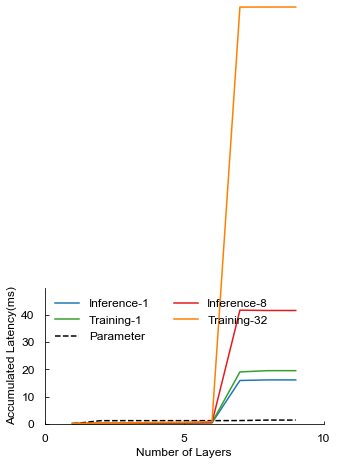

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable
import numpy as np
from math import log

# Reasonable - Bert
# Latency v.s. Layer
file_label = 'reasonable_albert'

# Import data
def import_data(filename):
    transmission_latency_ms_list = [0.0]
    computation_latency_ms_list = []
    with open(filename) as f:
        for line in f.readlines():
            parts = line.split(',')
            parameter_size_byte = int(parts[0].strip())
            transmission_latency_ms = float(parameter_size_byte) / 1024 / 1024 / 1024 * 8 / 100 * 1000
            transmission_latency_ms_list.append(transmission_latency_ms)
            computation_latency_s = float(parts[1].strip())
            computation_latency_ms = computation_latency_s * 1000
            computation_latency_ms_list.append(computation_latency_ms)
        computation_latency_ms_list.append(computation_latency_ms_list[-1])
    return transmission_latency_ms_list, computation_latency_ms_list

y_p, y_i1 = import_data('experiments/%s/inf-mode-albert_base-batch-1.txt' % file_label)
_, y_i8 = import_data('experiments/%s/inf-mode-albert_base-batch-8.txt' % file_label)
_, y_t1 = import_data('experiments/%s/train-mode-albert_base-batch-1.txt' % file_label)
_, y_t32 = import_data('experiments/%s/train-mode-albert_base-batch-32.txt' % file_label)
x = [i + 1 for i in range(len(y_p))]

# labels for x
x_label = 'Number of Layers'
x_ticks = [i * 5 for i in range(3)]
x_ticklabels = [str(i * 5) for i in range(3)]

# labels for y
y_label = 'Accumulated Latency(ms)'
y_ticks = [i * 10 for i in range(5)]
y_ticklabels = [str(i * 10) for i in range(5)]

# figure style
font_size = 12
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(5, 2.5))

# draw figure content
plt.plot(x, y_i1, label='Inference-1', color=colors_blue, linestyle='-', clip_on=False)
plt.plot(x, y_t1, label='Training-1', color=colors_green, linestyle='-', clip_on=False)
plt.plot(x, y_p, label='Parameter', color='black', linestyle='--', clip_on=False)
plt.plot(x, y_i8, label='Inference-8', color=colors_red, linestyle='-', clip_on=False)
plt.plot(x, y_t32, label='Training-32', color=colors_orange, linestyle='-', clip_on=False)
plt.legend(loc='upper left', frameon=False, ncol=2, prop={'size':font_size})

# draw figure labels
ax.tick_params(labelsize=font_size, pad=10)

ax.set_xlabel(x_label) 
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(left=0, right=10)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

ax.set_ylabel(y_label)
ax.yaxis.set_ticks_position('left')
ax.set_ylim(bottom=0, top=50)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)

ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight')

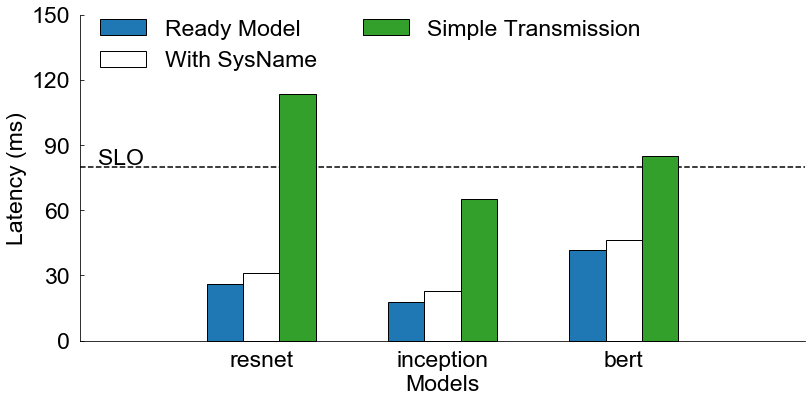

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable

# Application - Switch for V100
# Latency v.s. Setting
file_label = 'application_switch_v100'

# data
y_ready_s = [0.0259342289, 0.01787649155, 0.04149594307]
y_sys_s = [0.0259342289 + 0.005, 0.01787649155 + 0.005, 0.04149594307 + 0.005]
y_simple_s = [0.1135453987, 0.06534101009, 0.08477623463]
y_ready = [y * 1000 for y in y_ready_s]
y_sys = [y * 1000 for y in y_sys_s]
y_simple = [y * 1000 for y in y_simple_s]


# labels for x
x_label = 'Models'
width = 0.2
index_ready = [i + 0.8 for i in range(3)]
index_sys = [i + 1.0 for i in range(3)]
index_simple = [i + 1.2 for i in range(3)]

x_ticks = [i + 1.0 for i in range(3)]
x_ticklabels = ['resnet', 'inception', 'bert']

# labels for y
y_label = 'Latency (ms)'
y_ticks = [i * 30 for i in range(6)]
y_ticklabels = [str(i * 30) for i in range(6)]

font_size = 23
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(13, 6))

# Plot bars
plt.plot([0, 4], [80, 80], label='Boundary', color='black', linestyle='--', clip_on=False)
plt.text(0.1, 81, 'SLO')

b1 = plt.bar(index_ready, y_ready, width, color=colors_blue, zorder=3, clip_on=False, edgecolor='black')
b2 = plt.bar(index_sys, y_sys, width, color='white', zorder=3, clip_on=False, edgecolor='black')
b3 = plt.bar(index_simple, y_simple, width, color=colors_green, zorder=3, clip_on=False, edgecolor='black')
plt.legend((b1, b2, b3), ('Ready Model', 'With %s' % sysname, 'Simple Transmission'), 
           loc='upper left', bbox_to_anchor=(0.0, 1.05), ncol=2, frameon=False, prop={'size':font_size})

ax.tick_params(labelsize=font_size, pad=10)

# Plot x labels
ax.set_xlabel(x_label)
ax.set_xlim(left=0, right=4)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

# Plot y labels
ax.set_ylabel(y_label)
ax.set_ylim(bottom=0, top=150)
ax.yaxis.set_ticks_position('left')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)


ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight', transparent = True)

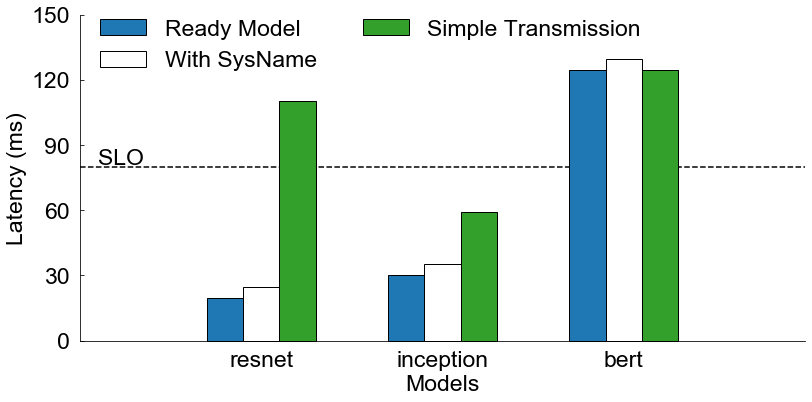

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable

# Application - Switch for T4
# Latency v.s. Setting
file_label = 'application_switch_t4'

# data
y_ready_s = [0.01947519779, 0.03004715919, 0.1243544245]
y_sys_s = [0.01947519779 + 0.005, 0.03004715919 + 0.005, 0.1243544245 + 0.005]
y_simple_s = [0.1101020098, 0.05911990166, 0.1243663263]
y_ready = [y * 1000 for y in y_ready_s]
y_sys = [y * 1000 for y in y_sys_s]
y_simple = [y * 1000 for y in y_simple_s]


# labels for x
x_label = 'Models'
width = 0.2
index_ready = [i + 0.8 for i in range(3)]
index_sys = [i + 1.0 for i in range(3)]
index_simple = [i + 1.2 for i in range(3)]

x_ticks = [i + 1.0 for i in range(3)]
x_ticklabels = ['resnet', 'inception', 'bert']

# labels for y
y_label = 'Latency (ms)'
y_ticks = [i * 30 for i in range(6)]
y_ticklabels = [str(i * 30) for i in range(6)]

font_size = 23
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(13, 6))

# Plot bars
plt.plot([0, 4], [80, 80], label='Boundary', color='black', linestyle='--', clip_on=False)
plt.text(0.1, 81, 'SLO')

b1 = plt.bar(index_ready, y_ready, width, color=colors_blue, zorder=3, clip_on=False, edgecolor='black')
b2 = plt.bar(index_sys, y_sys, width, color='white', zorder=3, clip_on=False, edgecolor='black')
b3 = plt.bar(index_simple, y_simple, width, color=colors_green, zorder=3, clip_on=False, edgecolor='black')
plt.legend((b1, b2, b3), ('Ready Model', 'With %s' % sysname, 'Simple Transmission'), 
           loc='upper left', bbox_to_anchor=(0.0, 1.05), ncol=2, frameon=False, prop={'size':font_size})

ax.tick_params(labelsize=font_size, pad=10)

# Plot x labels
ax.set_xlabel(x_label)
ax.set_xlim(left=0, right=4)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

# Plot y labels
ax.set_ylabel(y_label)
ax.set_ylim(bottom=0, top=150)
ax.yaxis.set_ticks_position('left')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)


ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')


plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight', transparent = True)

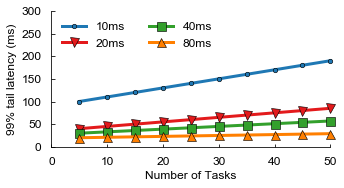

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable
import numpy as np
from math import log

# Application - Tail Latency for different throughputs, for V100
# 99% Latency v.s. Request Rate
file_label = 'application_tail_v100'

# data
x = [(i + 1) * 5 for i in range(10)]
y_10 = [100 + i * 10 for i in range(10)]
y_20 = [40 + i * 5 for i in range(10)]
y_40 = [30 + i * 3 for i in range(10)]
y_80 = [20 + i * 1 for i in range(10)]


# labels for x
x_label = 'Number of Tasks'
x_ticks = [i * 10 for i in range(6)]
x_ticklabels = [str(i * 10) for i in range(6)]

# labels for y
y_label = '99% tail latency (ms)'
y_ticks = [i * 50 for i in range(7)]
y_ticklabels = [str(i * 50) for i in range(7)]

# figure style
font_size = 12
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(5, 2.5))

# draw figure content
plt.plot(x, y_10, label='10ms', color=colors_blue, marker='.',markersize=9,linewidth=3,
         linestyle='-', clip_on=False, markeredgecolor='black',markeredgewidth=MW)
plt.plot(x, y_20, label='20ms', color=colors_red, marker='v',markersize=9,linewidth=3,
         linestyle='-', clip_on=False, markeredgecolor='black',markeredgewidth=MW)
plt.plot(x, y_40, label='40ms', color=colors_green, marker='s',markersize=9,linewidth=3,
         linestyle='-', clip_on=False, markeredgecolor='black',markeredgewidth=MW)
plt.plot(x, y_80, label='80ms', color=colors_orange, marker='^',markersize=9,linewidth=3,
         linestyle='-', clip_on=False, markeredgecolor='black',markeredgewidth=MW)
plt.legend(loc='upper left', frameon=False, ncol=2, prop={'size':font_size})

# draw figure labels
ax.tick_params(labelsize=font_size, pad=10)

ax.set_xlabel(x_label) 
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(left=0, right=50)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

ax.set_ylabel(y_label)
ax.yaxis.set_ticks_position('left')
ax.set_ylim(bottom=0, top=300)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)

ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight')

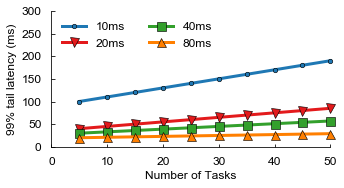

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable
import numpy as np
from math import log

# Application - Tail Latency for different throughputs, for T4
# 99% Latency v.s. Request Rate
file_label = 'application_tail_t4'

# data
x = [(i + 1) * 5 for i in range(10)]
y_10 = [100 + i * 10 for i in range(10)]
y_20 = [40 + i * 5 for i in range(10)]
y_40 = [30 + i * 3 for i in range(10)]
y_80 = [20 + i * 1 for i in range(10)]


# labels for x
x_label = 'Number of Tasks'
x_ticks = [i * 10 for i in range(6)]
x_ticklabels = [str(i * 10) for i in range(6)]

# labels for y
y_label = '99% tail latency (ms)'
y_ticks = [i * 50 for i in range(7)]
y_ticklabels = [str(i * 50) for i in range(7)]

# figure style
font_size = 12
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(5, 2.5))

# draw figure content
plt.plot(x, y_10, label='10ms', color=colors_blue, marker='.',markersize=9,linewidth=3,
         linestyle='-', clip_on=False, markeredgecolor='black',markeredgewidth=MW)
plt.plot(x, y_20, label='20ms', color=colors_red, marker='v',markersize=9,linewidth=3,
         linestyle='-', clip_on=False, markeredgecolor='black',markeredgewidth=MW)
plt.plot(x, y_40, label='40ms', color=colors_green, marker='s',markersize=9,linewidth=3,
         linestyle='-', clip_on=False, markeredgecolor='black',markeredgewidth=MW)
plt.plot(x, y_80, label='80ms', color=colors_orange, marker='^',markersize=9,linewidth=3,
         linestyle='-', clip_on=False, markeredgecolor='black',markeredgewidth=MW)
plt.legend(loc='upper left', frameon=False, ncol=2, prop={'size':font_size})

# draw figure labels
ax.tick_params(labelsize=font_size, pad=10)

ax.set_xlabel(x_label) 
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(left=0, right=50)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

ax.set_ylabel(y_label)
ax.yaxis.set_ticks_position('left')
ax.set_ylim(bottom=0, top=300)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)

ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight')

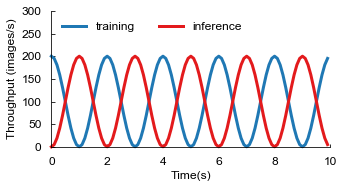

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable
import numpy as np
from math import log

# Application - GPU Utilization
# Throughput v.s. Time
file_label = 'application_utilization'

# data
pi = np.arctan(1.0) * 4
x = [i * 0.1 for i in range(100)]
y_training = (np.cos(2 * pi * np.asarray(x) / 2) + 1) * 100
y_inference = (1 - np.cos(2 * pi * np.asarray(x) / 2)) * 100

# labels for x
x_label = 'Time(s)'
x_ticks = [i * 2 for i in range(6)]
x_ticklabels = [str(i * 2) for i in range(6)]

# labels for y
y_label = 'Throughput (images/s)'
y_ticks = [i * 50 for i in range(7)]
y_ticklabels = [str(i * 50) for i in range(7)]

# figure style
font_size = 12
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(5, 2.5))

# draw figure content
plt.plot(x, y_training, label='training', color=colors_blue, linewidth=3, linestyle='-', clip_on=False)
plt.plot(x, y_inference, label='inference', color=colors_red, linewidth=3, linestyle='-', clip_on=False)
plt.legend(loc='upper left', frameon=False, ncol=2, prop={'size':font_size})

# draw figure labels
ax.tick_params(labelsize=font_size, pad=10)

ax.set_xlabel(x_label) 
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(left=0, right=10)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

ax.set_ylabel(y_label)
ax.yaxis.set_ticks_position('left')
ax.set_ylim(bottom=0, top=300)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)

ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight')

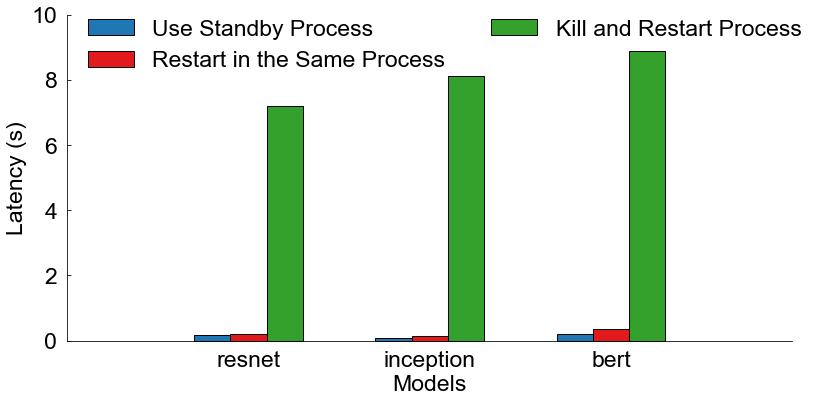

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable

# Components - Standby
# Latency v.s. Setting
file_label = 'component_standby'

# data
y_standby = [0.174988, 0.084721, 0.210544]
y_restart = [0.2100031853, 0.1333750367, 0.358817029]
y_kill = [7.194186549, 8.108153739, 8.892390957]

# labels for x
x_label = 'Models'
width = 0.2
index_standby = [i + 0.8 for i in range(3)]
index_restart = [i + 1.0 for i in range(3)]
index_kill = [i + 1.2 for i in range(3)]


x_ticks = [i + 1.0 for i in range(3)]
x_ticklabels = ['resnet', 'inception', 'bert']

# labels for y
y_label = 'Latency (s)'
y_ticks = [i * 2 for i in range(6)]
y_ticklabels = [str(i * 2) for i in range(6)]

font_size = 23
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(13, 6))

# Plot bars
b1 = plt.bar(index_standby, y_standby, width, color=colors_blue, zorder=3, clip_on=False, edgecolor='black')
b2 = plt.bar(index_restart, y_restart, width, color=colors_red, zorder=3, clip_on=False, edgecolor='black')
b3 = plt.bar(index_kill, y_kill, width, color=colors_green, zorder=3, clip_on=False, edgecolor='black')
plt.legend((b1, b2, b3), ('Use Standby Process', 'Restart in the Same Process', 'Kill and Restart Process', ), 
           loc='upper left', bbox_to_anchor=(0.0, 1.05), frameon=False, ncol=2, prop={'size':font_size})

ax.tick_params(labelsize=font_size, pad=10)

# Plot x labels
ax.set_xlabel(x_label)
ax.set_xlim(left=0, right=4)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

# Plot y labels
ax.set_ylabel(y_label)
ax.set_ylim(bottom=0, top=10)
ax.yaxis.set_ticks_position('left')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)


ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')


plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight', transparent = True)

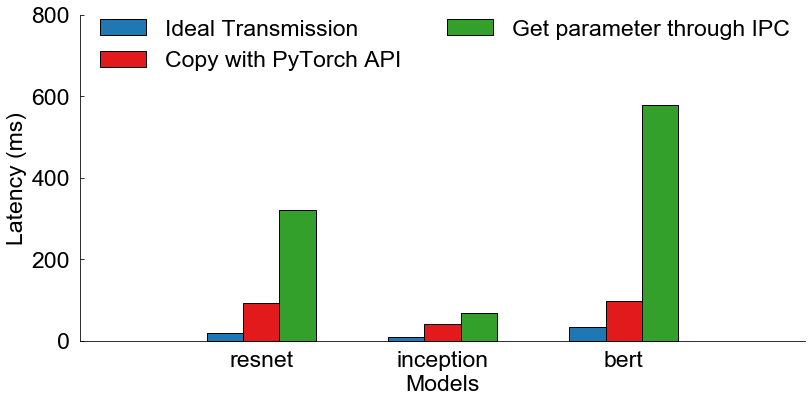

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable

# Components - Standby
# Latency v.s. Setting
file_label = 'component_memory'

# data
y_ideal = [0.017938, 0.008094, 0.032628]
y_copy = [0.091809, 0.041764, 0.097043]
y_ipc = [0.319714, 0.067453, 0.577697]

# labels for x
x_label = 'Models'
width = 0.2
index_ideal = [i + 0.8 for i in range(3)]
index_copy = [i + 1.0 for i in range(3)]
index_ipc = [i + 1.2 for i in range(3)]


x_ticks = [i + 1.0 for i in range(3)]
x_ticklabels = ['resnet', 'inception', 'bert']

# labels for y
y_label = 'Latency (ms)'
y_ticks = [i * 0.2 for i in range(5)]
y_ticklabels = [str(i * 200) for i in range(5)]

font_size = 23
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(13, 6))

# Plot bars
b1 = plt.bar(index_standby, y_ideal, width, color=colors_blue, zorder=3, clip_on=False, edgecolor='black')
b2 = plt.bar(index_restart, y_copy, width, color=colors_red, zorder=3, clip_on=False, edgecolor='black')
b3 = plt.bar(index_kill, y_ipc, width, color=colors_green, zorder=3, clip_on=False, edgecolor='black')
plt.legend((b1, b2, b3), ('Ideal Transmission', 'Copy with PyTorch API', 'Get parameter through IPC', ), 
           loc='upper left', bbox_to_anchor=(0.0, 1.05), frameon=False, ncol=2, prop={'size':font_size})

ax.tick_params(labelsize=font_size, pad=10)

# Plot x labels
ax.set_xlabel(x_label)
ax.set_xlim(left=0, right=4)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

# Plot y labels
ax.set_ylabel(y_label)
ax.set_ylim(bottom=0, top=0.8)
ax.yaxis.set_ticks_position('left')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)


ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')


plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight', transparent = True)

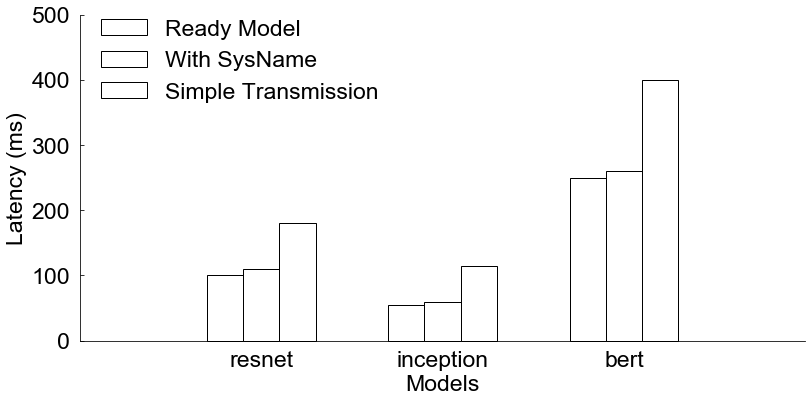

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable

# Loading Task - Training
# Latency v.s. Setting
file_label = 'loading_training'

# data
y_ready = [100, 55, 250]
y_sys = [110, 60, 260]
y_simple = [180, 115, 400]


# labels for x
x_label = 'Models'
width = 0.2
index_ready = [i + 0.8 for i in range(3)]
index_sys = [i + 1.0 for i in range(3)]
index_simple = [i + 1.2 for i in range(3)]

x_ticks = [i + 1.0 for i in range(3)]
x_ticklabels = ['resnet', 'inception', 'bert']

# labels for y
y_label = 'Latency (ms)'
y_ticks = [i * 100 for i in range(6)]
y_ticklabels = [str(i * 100) for i in range(6)]

font_size = 23
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(13, 6))

# Plot bars
b1 = plt.bar(index_ready, y_ready, width, color='white', zorder=3, clip_on=False, edgecolor='black')
b2 = plt.bar(index_sys, y_sys, width, color='white', zorder=3, clip_on=False, edgecolor='black')
b3 = plt.bar(index_simple, y_simple, width, color='white', zorder=3, clip_on=False, edgecolor='black')
plt.legend((b1, b2, b3), ('Ready Model', 'With %s' % sysname, 'Simple Transmission'), 
           loc='upper left', bbox_to_anchor=(0.0, 1.05), frameon=False, prop={'size':font_size})

ax.tick_params(labelsize=font_size, pad=10)

# Plot x labels
ax.set_xlabel(x_label)
ax.set_xlim(left=0, right=4)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

# Plot y labels
ax.set_ylabel(y_label)
ax.set_ylim(bottom=0, top=500)
ax.yaxis.set_ticks_position('left')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)


ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')


plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight', transparent = True)

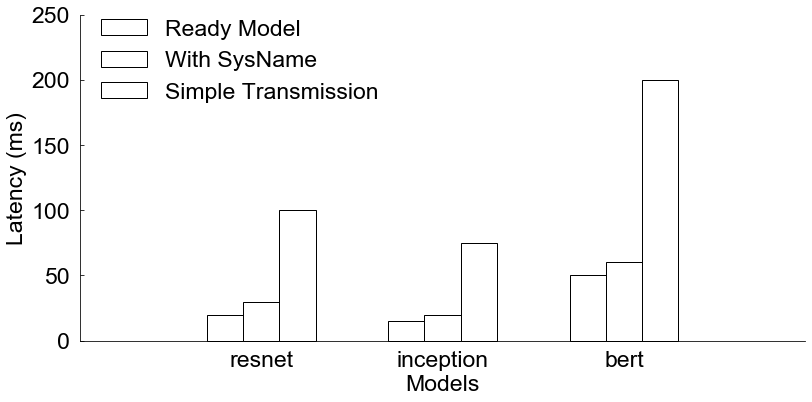

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable

# Loading Task - Inference
# Latency v.s. Setting
file_label = 'loading_inference'

# data
y_ready = [20, 15, 50]
y_sys = [30, 20, 60]
y_simple = [100, 75, 200]


# labels for x
x_label = 'Models'
width = 0.2
index_ready = [i + 0.8 for i in range(3)]
index_sys = [i + 1.0 for i in range(3)]
index_simple = [i + 1.2 for i in range(3)]

x_ticks = [i + 1.0 for i in range(3)]
x_ticklabels = ['resnet', 'inception', 'bert']

# labels for y
y_label = 'Latency (ms)'
y_ticks = [i * 50 for i in range(6)]
y_ticklabels = [str(i * 50) for i in range(6)]

font_size = 23
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(13, 6))

# Plot bars
b1 = plt.bar(index_ready, y_ready, width, color='white', zorder=3, clip_on=False, edgecolor='black')
b2 = plt.bar(index_sys, y_sys, width, color='white', zorder=3, clip_on=False, edgecolor='black')
b3 = plt.bar(index_simple, y_simple, width, color='white', zorder=3, clip_on=False, edgecolor='black')
plt.legend((b1, b2, b3), ('Ready Model', 'With %s' % sysname, 'Simple Transmission'), 
           loc='upper left', bbox_to_anchor=(0.0, 1.05), frameon=False, prop={'size':font_size})

ax.tick_params(labelsize=font_size, pad=10)

# Plot x labels
ax.set_xlabel(x_label)
ax.set_xlim(left=0, right=4)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

# Plot y labels
ax.set_ylabel(y_label)
ax.set_ylim(bottom=0, top=250)
ax.yaxis.set_ticks_position('left')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)


ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')


plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight', transparent = True)

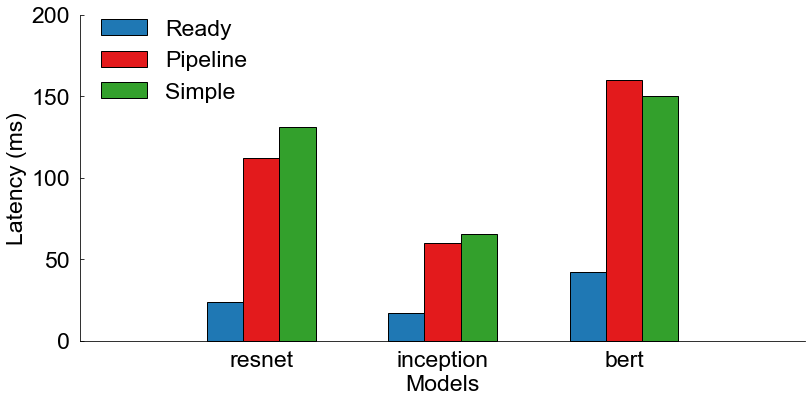

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable

# Components - Pipeline
# Latency v.s. Setting
file_label = 'component_pipeline'

# data
y_ready = [0.0237487793, 0.01723082066, 0.0420257926]
y_pipeline = [0.111788, 0.060209, 0.159914]
y_simple = [0.131263, 0.065369, 0.150205]

# labels for x
x_label = 'Models'
width = 0.2
index_ready = [i + 0.8 for i in range(3)]
index_pipeline = [i + 1.0 for i in range(3)]
index_simple = [i + 1.2 for i in range(3)]

x_ticks = [i + 1.0 for i in range(3)]
x_ticklabels = ['resnet', 'inception', 'bert']

# labels for y
y_label = 'Latency (ms)'
y_ticks = [i * 0.05 for i in range(5)]
y_ticklabels = [str(i * 50) for i in range(5)]

font_size = 23
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(13, 6))

# Plot bars
b1 = plt.bar(index_ready, y_ready, width, color=colors_blue, zorder=3, clip_on=False, edgecolor='black')
b2 = plt.bar(index_pipeline, y_pipeline, width, color=colors_red, zorder=3, clip_on=False, edgecolor='black')
b3 = plt.bar(index_simple, y_simple, width, color=colors_green, zorder=3, clip_on=False, edgecolor='black')
plt.legend((b1, b2, b3), ('Ready', 'Pipeline', 'Simple'), 
           loc='upper left', bbox_to_anchor=(0.0, 1.05), frameon=False, prop={'size':font_size})

ax.tick_params(labelsize=font_size, pad=10)

# Plot x labels
ax.set_xlabel(x_label)
ax.set_xlim(left=0, right=4)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

# Plot y labels
ax.set_ylabel(y_label)
ax.set_ylim(bottom=0, top=0.2)
ax.yaxis.set_ticks_position('left')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)


ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')


plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight', transparent = True)

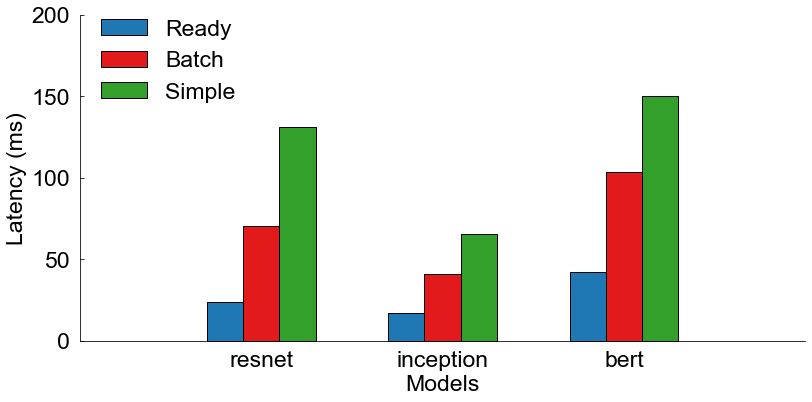

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable

# Components - Batch
# Latency v.s. Setting
file_label = 'component_batch'

# data
y_ready = [0.0237487793, 0.01723082066, 0.0420257926]
y_batch = [0.070634, 0.041142, 0.103470]
y_simple = [0.131263, 0.065369, 0.150205]

# labels for x
x_label = 'Models'
width = 0.2
index_ready = [i + 0.8 for i in range(3)]
index_batch = [i + 1.0 for i in range(3)]
index_simple = [i + 1.2 for i in range(3)]

x_ticks = [i + 1.0 for i in range(3)]
x_ticklabels = ['resnet', 'inception', 'bert']

# labels for y
y_label = 'Latency (ms)'
y_ticks = [i * 0.05 for i in range(5)]
y_ticklabels = [str(i * 50) for i in range(5)]

font_size = 23
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(13, 6))

# Plot bars
b1 = plt.bar(index_ready, y_ready, width, color=colors_blue, zorder=3, clip_on=False, edgecolor='black')
b2 = plt.bar(index_batch, y_batch, width, color=colors_red, zorder=3, clip_on=False, edgecolor='black')
b3 = plt.bar(index_simple, y_simple, width, color=colors_green, zorder=3, clip_on=False, edgecolor='black')
plt.legend((b1, b2, b3), ('Ready', 'Batch', 'Simple'), 
           loc='upper left', bbox_to_anchor=(0.0, 1.05), frameon=False, prop={'size':font_size})

ax.tick_params(labelsize=font_size, pad=10)

# Plot x labels
ax.set_xlabel(x_label)
ax.set_xlim(left=0, right=4)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

# Plot y labels
ax.set_ylabel(y_label)
ax.set_ylim(bottom=0, top=0.2)
ax.yaxis.set_ticks_position('left')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)


ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')


plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight', transparent = True)

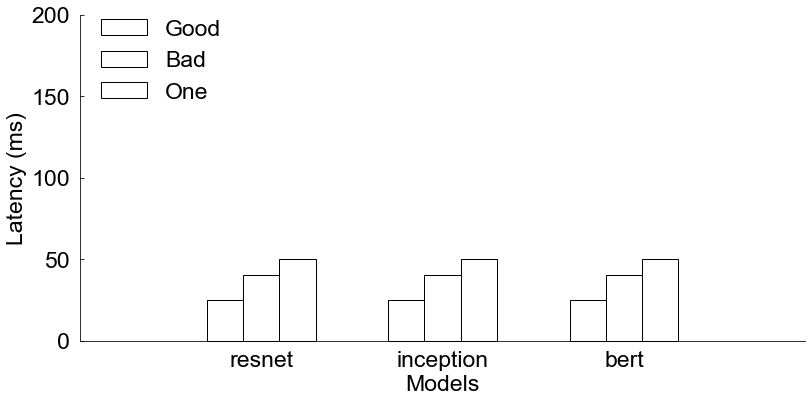

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import palettable

# Components - Partition
# Latency v.s. Setting
file_label = 'component_partition'

# data
y_good = [25, 25, 25]
y_bad = [40, 40, 40]
y_one = [50, 50, 50]

# labels for x
x_label = 'Models'
width = 0.2
index_good = [i + 0.8 for i in range(3)]
index_bad = [i + 1.0 for i in range(3)]
index_one = [i + 1.2 for i in range(3)]

x_ticks = [i + 1.0 for i in range(3)]
x_ticklabels = ['resnet', 'inception', 'bert']

# labels for y
y_label = 'Latency (ms)'
y_ticks = [i * 50 for i in range(5)]
y_ticklabels = [str(i * 50) for i in range(5)]

font_size = 23
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)
fig, ax = plt.subplots(figsize=(13, 6))

# Plot bars
b1 = plt.bar(index_good, y_good, width, color='white', zorder=3, clip_on=False, edgecolor='black')
b2 = plt.bar(index_bad, y_bad, width, color='white', zorder=3, clip_on=False, edgecolor='black')
b3 = plt.bar(index_one, y_one, width, color='white', zorder=3, clip_on=False, edgecolor='black')
plt.legend((b1, b2, b3), ('Good', 'Bad', 'One'), 
           loc='upper left', bbox_to_anchor=(0.0, 1.05), frameon=False, prop={'size':font_size})

ax.tick_params(labelsize=font_size, pad=10)

# Plot x labels
ax.set_xlabel(x_label)
ax.set_xlim(left=0, right=4)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

# Plot y labels
ax.set_ylabel(y_label)
ax.set_ylim(bottom=0, top=100)
ax.yaxis.set_ticks_position('left')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)


ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')

ax.spines['top'].set_color('none')  
ax.spines['right'].set_color('none')


plt.savefig('Eval_%s.pdf' % (file_label), bbox_inches='tight', transparent = True)